# Telecom Churn - Group Case Study

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
telco = pd.read_csv('telecom_churn_data.csv')
telco_copy = telco.copy()

## DATA Understanding and Cleaning

In [3]:
telco.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telco.shape

(99999, 226)

 ## Filtering High Value customers

In [5]:
# analyzing al recharge related columns
rechrg_cols = ['av_rech_amt_data_6', 'total_rech_data_6', 'total_rech_amt_6', 
               'av_rech_amt_data_7', 'total_rech_data_7', 'total_rech_amt_7',
               'av_rech_amt_data_8', 'total_rech_data_8', 'total_rech_amt_8']
telco[rechrg_cols].head()

,av_rech_amt_data_6,total_rech_data_6,total_rech_amt_6,av_rech_amt_data_7,total_rech_data_7,total_rech_amt_7,av_rech_amt_data_8,total_rech_data_8,total_rech_amt_8
0,252.0,1.0,362,252.0,1.0,252,252.0,1.0,252
1,NaN,NaN,74,154.0,1.0,384,50.0,2.0,283
2,NaN,NaN,168,NaN,NaN,315,NaN,NaN,116
3,NaN,NaN,230,NaN,NaN,310,NaN,NaN,601
4,56.0,1.0,196,NaN,NaN,350,NaN,NaN,287


In [6]:
# imputing missing values for recharge columns with 0
telco[rechrg_cols] = telco[rechrg_cols].fillna(0)

In [7]:
telco[rechrg_cols].head()

,av_rech_amt_data_6,total_rech_data_6,total_rech_amt_6,av_rech_amt_data_7,total_rech_data_7,total_rech_amt_7,av_rech_amt_data_8,total_rech_data_8,total_rech_amt_8
0,252.0,1.0,362,252.0,1.0,252,252.0,1.0,252
1,0.0,0.0,74,154.0,1.0,384,50.0,2.0,283
2,0.0,0.0,168,0.0,0.0,315,0.0,0.0,116
3,0.0,0.0,230,0.0,0.0,310,0.0,0.0,601
4,56.0,1.0,196,0.0,0.0,350,0.0,0.0,287


In [8]:
# deriving a new column per month to calculate total recharge amount
# total_recharge_amount  = (av_rech_amt_data * total_rech_data) + total_rech_amt

telco['total_recharge_amount_6'] = (telco['av_rech_amt_data_6'] * telco['total_rech_data_6']) + telco['total_rech_amt_6']
telco['total_recharge_amount_7'] = (telco['av_rech_amt_data_7'] * telco['total_rech_data_7']) + telco['total_rech_amt_7']
telco['total_recharge_amount_8'] = (telco['av_rech_amt_data_8'] * telco['total_rech_data_8']) + telco['total_rech_amt_8']

In [9]:
# calculating avereage recharge amount for 6th and 7th month
telco['avg_recharge_6_7'] = (telco['total_recharge_amount_6'] + telco['total_recharge_amount_7'])/2

In [10]:
# calcualting X : 70th percentile of avg. recharge amount of 6 and 7 months
X = np.percentile(telco['avg_recharge_6_7'],70)
X

478.0

In [11]:
# filtering out high value customers with aberage recharge amount of 6 and 7 months >= X
telco = telco[telco['avg_recharge_6_7']>= X]
telco.shape

(30001, 230)

In [12]:
# dropping  original columns:
drop_cols = ['av_rech_amt_data_6','total_rech_data_6','total_rech_amt_6',
             'av_rech_amt_data_7','total_rech_data_7','total_rech_amt_7',
             'av_rech_amt_data_8','total_rech_data_8','total_rech_amt_8']
telco.drop(drop_cols, axis = 1, inplace=True)

In [13]:
telco.shape

(30001, 221)

###  Check and Treat the missing values

In [14]:
round(100*telco.isnull().sum()/len(telco),2).sort_values(ascending = False)

max_rech_data_9             49.27
fb_user_9                   49.27
night_pck_user_9            49.27
count_rech_2g_9             49.27
total_rech_data_9           49.27
date_of_last_rech_data_9    49.27
arpu_3g_9                   49.27
arpu_2g_9                   49.27
av_rech_amt_data_9          49.27
count_rech_3g_9             49.27
arpu_3g_8                   46.83
arpu_2g_8                   46.83
night_pck_user_8            46.83
count_rech_2g_8             46.83
max_rech_data_8             46.83
count_rech_3g_8             46.83
date_of_last_rech_data_8    46.83
fb_user_8                   46.83
date_of_last_rech_data_6    44.15
max_rech_data_6             44.15
night_pck_user_6            44.15
arpu_2g_6                   44.15
count_rech_2g_6             44.15
arpu_3g_6                   44.15
fb_user_6                   44.15
count_rech_3g_6             44.15
date_of_last_rech_data_7    43.15
fb_user_7                   43.15
night_pck_user_7            43.15
count_rech_2g_

In [15]:
drop_cols = pd.DataFrame(round(100*telco.isnull().sum()/len(telco),2).sort_values(ascending = False))
drop_cols = drop_cols.reset_index().rename(columns = {'index': 'col_name', 0:'missing_percent'})
drop_cols.head()

,col_name,missing_percent
0,max_rech_data_9,49.27
1,fb_user_9,49.27
2,night_pck_user_9,49.27
3,count_rech_2g_9,49.27
4,total_rech_data_9,49.27


In [16]:
# dropping columns with missing values >= 40 percent
drop_list = drop_cols[(drop_cols.missing_percent >= 40)]['col_name'].to_list()
telco.drop(drop_list, axis=1, inplace = True)

In [17]:
telco.shape

(30001, 187)

In [18]:
#checking date columns
date_cols = telco.filter(regex='date', axis = 1).columns.to_list()
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [19]:
# date columns doesnt appear to be useful, so we can drop these.
telco.drop(date_cols,axis = 1, inplace = True)
# also mobile_number can be dropped as well.
telco.drop(['mobile_number'],axis = 1, inplace = True)

In [20]:
telco.shape

(30001, 178)

In [21]:
telco.nunique().sort_values()

circle_id                      1
loc_og_t2o_mou                 1
std_og_t2o_mou                 1
loc_ic_t2o_mou                 1
std_ic_t2o_mou_6               1
std_ic_t2o_mou_7               1
std_ic_t2o_mou_8               1
std_ic_t2o_mou_9               1
std_og_t2c_mou_6               1
std_og_t2c_mou_7               1
std_og_t2c_mou_8               1
std_og_t2c_mou_9               1
monthly_2g_9                   5
monthly_2g_6                   5
monthly_2g_8                   6
monthly_2g_7                   6
monthly_3g_9                  11
monthly_3g_8                  12
monthly_3g_6                  12
monthly_3g_7                  15
sachet_3g_6                   25
sachet_3g_7                   27
sachet_3g_9                   27
sachet_3g_8                   29
sachet_2g_6                   31
sachet_2g_9                   32
sachet_2g_8                   34
sachet_2g_7                   35
spl_ic_mou_6                  78
spl_ic_mou_8                  80
spl_ic_mou

In [22]:
# dropping columns with only 1 unique value throughtout the dataset
drop_cols = ['circle_id','loc_og_t2o_mou', 'std_og_t2o_mou',  'loc_ic_t2o_mou', 'std_ic_t2o_mou_6',
             'std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','std_og_t2c_mou_6',
             'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9']
telco.drop(drop_cols, axis = 1 , inplace= True)

In [23]:
telco.shape

(30001, 166)

In [24]:
# renamaing cols with month name format
telco.rename(columns= {'jun_vbc_3g': 'vbc_3g_6','jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}, inplace= True)


In [25]:
# taking all columns from 6th month to analyse further
cols_6 = telco.filter(regex='_6', axis = 1).columns
cols_6.to_list()

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'vbc_3g_6',
 'total_recharge_amount_6',
 'avg_recharge_6_7']

In [26]:
#checking missing vlues in 6th month columns
round(100*telco[cols_6].isnull().sum()/len(telco),2).sort_values(ascending = False)

loc_ic_t2f_mou_6           1.82
spl_ic_mou_6               1.82
og_others_6                1.82
std_og_mou_6               1.82
loc_ic_t2t_mou_6           1.82
loc_ic_t2m_mou_6           1.82
std_og_t2f_mou_6           1.82
loc_ic_mou_6               1.82
std_ic_t2t_mou_6           1.82
std_ic_t2m_mou_6           1.82
std_ic_t2f_mou_6           1.82
std_ic_mou_6               1.82
std_og_t2m_mou_6           1.82
isd_ic_mou_6               1.82
isd_og_mou_6               1.82
ic_others_6                1.82
std_og_t2t_mou_6           1.82
loc_og_mou_6               1.82
loc_og_t2c_mou_6           1.82
loc_og_t2f_mou_6           1.82
loc_og_t2m_mou_6           1.82
loc_og_t2t_mou_6           1.82
roam_og_mou_6              1.82
roam_ic_mou_6              1.82
offnet_mou_6               1.82
onnet_mou_6                1.82
spl_og_mou_6               1.82
avg_recharge_6_7           0.00
total_og_mou_6             0.00
total_recharge_amount_6    0.00
total_ic_mou_6             0.00
total_re

In [27]:
telco[telco['loc_ic_t2f_mou_6'].isna()][cols_6].describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,max_rech_amt_6,last_day_rch_amt_6,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,vbc_3g_6,total_recharge_amount_6,avg_recharge_6_7
count,545.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,0.0,0.0,0.0,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,251.845488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.902752,211.902752,154.194495,52.459890,907.427211,0.062385,0.321101,0.689908,0.192661,147.850018,846.062385,1139.783486
std,341.566474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.719701,249.663972,238.186783,193.790804,1454.400720,0.277459,1.373868,0.851679,1.085305,403.837844,1259.885677,1216.448966
min,-20.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
50%,213.802000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.000000,198.000000,17.000000,0.000000,391.090000,0.000000,0.000000,1.000000,0.000000,0.000000,504.000000,772.500000
75%,386.502000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.000000,252.000000,252.000000,14.670000,1149.970000,0.000000,0.000000,1.000000,0.000000,49.320000,1152.000000,1223.000000
max,4050.626000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,34.000000,1555.000000,1555.000000,2072.760000,11253.970000,2.000000,14.000000,6.000000,19.000000,3678.650000,12898.000000,12710.000000


In [28]:
# based on the result above, we can conclude that if one column(loc_ic_t2f_mou_6 for example) is nan, many others also are missing.
# we can safely conclude that the customer has not used those services for this month
# and thus can impute these missing values with 0
telco[cols_6] = telco[cols_6].fillna(0)

In [29]:
# similarly, taking all columns from 7th and 8th month to analyse further
cols_7 = telco.filter(regex='_7', axis = 1).columns.to_list()
cols_8 = telco.filter(regex='_8', axis = 1).columns.to_list()

In [30]:
#checking missing vlues in 7th month columns
round(100*telco[cols_7].isnull().sum()/len(telco),2).sort_values(ascending = False)

loc_ic_t2f_mou_7           1.79
spl_ic_mou_7               1.79
og_others_7                1.79
std_og_mou_7               1.79
loc_ic_t2t_mou_7           1.79
loc_ic_t2m_mou_7           1.79
std_og_t2f_mou_7           1.79
loc_ic_mou_7               1.79
std_ic_t2t_mou_7           1.79
std_ic_t2m_mou_7           1.79
std_ic_t2f_mou_7           1.79
std_ic_mou_7               1.79
std_og_t2m_mou_7           1.79
isd_ic_mou_7               1.79
isd_og_mou_7               1.79
ic_others_7                1.79
std_og_t2t_mou_7           1.79
loc_og_mou_7               1.79
loc_og_t2c_mou_7           1.79
loc_og_t2f_mou_7           1.79
loc_og_t2m_mou_7           1.79
loc_og_t2t_mou_7           1.79
roam_og_mou_7              1.79
roam_ic_mou_7              1.79
offnet_mou_7               1.79
onnet_mou_7                1.79
spl_og_mou_7               1.79
avg_recharge_6_7           0.00
total_og_mou_7             0.00
total_recharge_amount_7    0.00
total_ic_mou_7             0.00
total_re

In [31]:
telco[telco['loc_ic_t2f_mou_7'].isna()][cols_7].describe()

,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,max_rech_amt_7,last_day_rch_amt_7,vol_2g_mb_7,vol_3g_mb_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,vbc_3g_7,total_recharge_amount_7,avg_recharge_6_7
count,537.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.0,0.0,0.0,0.0,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,225.359810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.471136,189.398510,114.158287,52.134991,958.151434,0.087523,0.363128,0.651769,0.270019,176.551508,896.318436,1210.614060
std,311.044652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.760260,238.537501,201.758831,176.522190,1955.714233,0.337037,1.454657,0.837419,1.821230,445.550075,1777.295033,1608.091294
min,-5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,559.500000
50%,190.387000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.000000,154.000000,0.000000,0.000000,319.660000,0.000000,0.000000,0.000000,0.000000,0.000000,504.000000,791.500000
75%,279.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.000000,252.000000,252.000000,12.380000,1096.310000,0.000000,0.000000,1.000000,0.000000,94.310000,1100.000000,1206.000000
max,3711.661000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,36.000000,1555.000000,1555.000000,2078.550000,27600.290000,2.000000,13.000000,6.000000,35.000000,3343.830000,21525.000000,23530.000000


In [32]:
#checking missing vlues in 8th month columns
round(100*telco[cols_8].isnull().sum()/len(telco),2).sort_values(ascending = False)

loc_ic_t2f_mou_8           3.91
std_og_t2t_mou_8           3.91
spl_og_mou_8               3.91
og_others_8                3.91
std_og_t2f_mou_8           3.91
loc_ic_t2t_mou_8           3.91
loc_ic_t2m_mou_8           3.91
std_og_t2m_mou_8           3.91
loc_ic_mou_8               3.91
std_ic_t2t_mou_8           3.91
std_ic_t2m_mou_8           3.91
std_ic_t2f_mou_8           3.91
std_ic_mou_8               3.91
spl_ic_mou_8               3.91
std_og_mou_8               3.91
isd_ic_mou_8               3.91
ic_others_8                3.91
loc_og_mou_8               3.91
loc_og_t2c_mou_8           3.91
loc_og_t2f_mou_8           3.91
loc_og_t2m_mou_8           3.91
loc_og_t2t_mou_8           3.91
roam_og_mou_8              3.91
roam_ic_mou_8              3.91
offnet_mou_8               3.91
onnet_mou_8                3.91
isd_og_mou_8               3.91
total_recharge_amount_8    0.00
total_og_mou_8             0.00
vbc_3g_8                   0.00
total_ic_mou_8             0.00
total_re

In [33]:
telco[telco['loc_ic_t2f_mou_8'].isna()][cols_8].describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,total_recharge_amount_8
count,1174.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1174.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1174.0,0.0,0.0,0.0,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,83.987831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.964225,71.913118,44.327087,24.811193,359.992376,0.033220,0.181431,0.238501,0.086031,61.318313,314.934412
std,196.762992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.050616,170.779980,135.076898,128.754627,1113.658124,0.205849,1.043126,0.581924,0.794434,270.318913,956.668290
min,-37.887000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.743750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.500000
max,1925.118000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,24.000000,1555.000000,951.000000,1607.880000,14544.610000,2.000000,11.000000,5.000000,16.000000,3962.910000,19491.000000


In [34]:
# based on the results above, we can similarly impute these missing values with 0 as done for 6th month columns
telco[cols_7] = telco[cols_7].fillna(0)
telco[cols_8] = telco[cols_8].fillna(0)

In [35]:
#checking the missing values on entire dataset
round(100*telco.isnull().sum()/len(telco),2).sort_values(ascending = False)

std_og_t2t_mou_9           6.34
loc_og_t2f_mou_9           6.34
std_ic_t2m_mou_9           6.34
spl_og_mou_9               6.34
std_og_t2m_mou_9           6.34
std_ic_t2f_mou_9           6.34
loc_og_t2m_mou_9           6.34
isd_og_mou_9               6.34
std_ic_mou_9               6.34
std_ic_t2t_mou_9           6.34
loc_og_t2c_mou_9           6.34
std_og_mou_9               6.34
loc_og_mou_9               6.34
std_og_t2f_mou_9           6.34
spl_ic_mou_9               6.34
ic_others_9                6.34
roam_og_mou_9              6.34
loc_og_t2t_mou_9           6.34
onnet_mou_9                6.34
offnet_mou_9               6.34
loc_ic_t2m_mou_9           6.34
loc_ic_t2t_mou_9           6.34
loc_ic_t2f_mou_9           6.34
loc_ic_mou_9               6.34
isd_ic_mou_9               6.34
og_others_9                6.34
roam_ic_mou_9              6.34
spl_og_mou_7               0.00
std_og_t2f_mou_6           0.00
std_og_t2f_mou_7           0.00
std_og_t2f_mou_8           0.00
og_other

In [36]:
# all the remaining missing avalues are from month 9 columns
# since we are only going to consider 4 columns out of these to tag churners
#checking hte missing values for these 4 ONLY
churner_cols = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
round(100*telco[churner_cols].isnull().sum()/len(telco),2).sort_values(ascending = False)

vol_3g_mb_9       0.0
vol_2g_mb_9       0.0
total_og_mou_9    0.0
total_ic_mou_9    0.0
dtype: float64

In [37]:
# Tag churners
# based on Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
telco['churn'] = np.where(telco[churner_cols].sum(axis = 1) ==0, 1,0) 

In [38]:
churner_cols.extend(['churn'])
churner_cols

['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'churn']

In [39]:
# verifying the churn column values
telco[churner_cols].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0


In [40]:
# taking all 9th  month columns in a list
cols_9  = telco.filter(regex= '_9', axis = 1).columns.to_list()
cols_9 

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'vbc_3g_9']

In [41]:
# remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
telco.drop(cols_9, axis = 1, inplace = True)

In [42]:
telco.shape

(30001, 126)

## Data Preparation


In [43]:
telco['churn'].value_counts()/len(telco)*100
# 91% of the high value customers do not churn.

0    91.863605
1     8.136395
Name: churn, dtype: float64

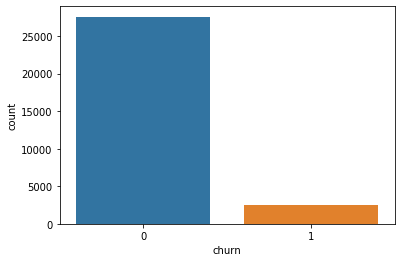

In [44]:
sns.countplot(telco['churn']); # the data is imbalanced and we will have to fix this later

In [45]:
# analyzing the pattern of the recharge amount using the DERIVED VARIABLES:
# ('total_recharge_amount_6', 'total_recharge_amount_7' , 'total_recharge_amount_8')
df = telco.groupby('churn')['total_recharge_amount_6','total_recharge_amount_7','total_recharge_amount_8'].mean()
df

,total_recharge_amount_6,total_recharge_amount_7,total_recharge_amount_8
churn,,,
0,1109.651781,1208.584619,1110.586829
1,1193.936370,964.583806,336.676182


In [46]:
df1 = df.stack().reset_index()
df1

,churn,level_1,0
0,0,total_recharge_amount_6,1109.651781
1,0,total_recharge_amount_7,1208.584619
2,0,total_recharge_amount_8,1110.586829
3,1,total_recharge_amount_6,1193.936370
4,1,total_recharge_amount_7,964.583806
5,1,total_recharge_amount_8,336.676182


In [47]:
df1.rename(columns= {'level_1': 'label', 0: 'mean'}, inplace=True)
df1

,churn,label,mean
0,0,total_recharge_amount_6,1109.651781
1,0,total_recharge_amount_7,1208.584619
2,0,total_recharge_amount_8,1110.586829
3,1,total_recharge_amount_6,1193.936370
4,1,total_recharge_amount_7,964.583806
5,1,total_recharge_amount_8,336.676182


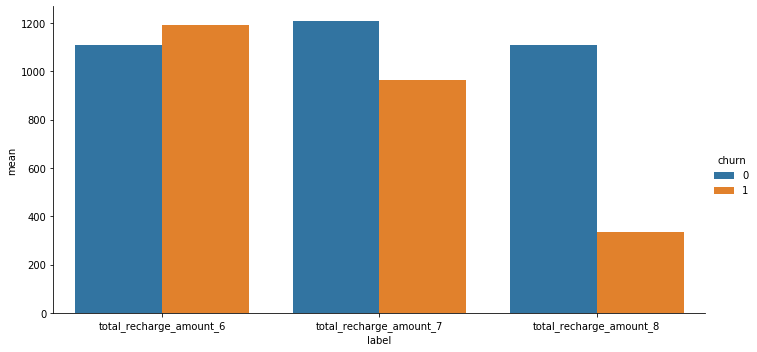

In [48]:
sns.catplot(data = df1, x = 'label', y = 'mean', hue = 'churn', kind = 'bar', aspect= 2);
# we can observe that there is a drop in total recharge amount for the 'CHURN' customers in the action phase(8th month)
# while the recharge amount for non-churn customers is pretty consistent through all the months

In [49]:
cols_og = ['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6']
telco[cols_og].head()
# this shows that the 'loc_og_mou_6' stores the sum of remaining 'loc_og*' columns

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6
0,0.00,0.00,0.00,0.0,0.00
7,51.39,308.63,62.13,0.0,422.16
8,297.13,80.96,0.00,0.0,378.09
21,4.48,91.81,0.75,0.0,97.04
23,48.96,82.94,0.00,0.0,131.91


#### Since our primary focus is on Usage- based churn, we can drop operator level columns and focus on the total min of usage ( Local, STD, ISD, Special, Roaming)

In [50]:
# getting the list of operator level columns which can be dropped
drop_cols = telco.filter(regex='_t2').columns.to_list()
drop_cols

['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8']

In [51]:
# dropping these columns
telco.drop(drop_cols, axis = 1 , inplace=True)

In [52]:
# also few other columns can be dropped :
drop_cols = ['avg_recharge_6_7','last_day_rch_amt_8', 'last_day_rch_amt_7', 'last_day_rch_amt_6']
telco.drop(drop_cols, axis = 1 , inplace=True)

In [53]:
telco.shape

(30001, 83)

In [54]:
# total incoming/outgoing mou is given by the total_ic_mou/ total_og_mou for everymonth
telco[['loc_ic_mou_6','std_ic_mou_6','spl_ic_mou_6', 'isd_ic_mou_6','ic_others_6','roam_ic_mou_6','total_ic_mou_6']].head()

,loc_ic_mou_6,std_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,roam_ic_mou_6,total_ic_mou_6
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,427.88,180.54,0.21,2.06,15.74,16.23,626.46
8,81.43,22.43,0.00,0.00,0.00,0.00,103.86
21,125.33,81.76,0.00,0.00,0.00,0.00,207.09
23,116.63,2.94,0.00,0.00,0.00,0.00,119.58


In [55]:
# analyzing the pattern of the total  incoming outgoing  min of usage:
# ('total_recharge_amount_6', 'total_recharge_amount_7' , 'total_recharge_amount_8')

df_ic = telco.groupby('churn')['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()
df_og = telco.groupby('churn')['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()
print(df_ic)
print(df_og)

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn                                                
0          295.131789      306.840677      299.096525
1          231.451344      182.907534       63.444342
       total_og_mou_6  total_og_mou_7  total_og_mou_8
churn                                                
0          593.763075      628.442026      581.998003
1          791.678435      627.508218      209.361368


In [56]:
df1_ic = df_ic.stack().reset_index()
df1_og = df_og.stack().reset_index()

In [57]:
print(df1_ic)
print(df1_og)

   churn         level_1           0
0      0  total_ic_mou_6  295.131789
1      0  total_ic_mou_7  306.840677
2      0  total_ic_mou_8  299.096525
3      1  total_ic_mou_6  231.451344
4      1  total_ic_mou_7  182.907534
5      1  total_ic_mou_8   63.444342
   churn         level_1           0
0      0  total_og_mou_6  593.763075
1      0  total_og_mou_7  628.442026
2      0  total_og_mou_8  581.998003
3      1  total_og_mou_6  791.678435
4      1  total_og_mou_7  627.508218
5      1  total_og_mou_8  209.361368


In [58]:
df1_ic.rename(columns= {'level_1': 'label', 0: 'mean'}, inplace=True)
df1_og.rename(columns= {'level_1': 'label', 0: 'mean'}, inplace=True)

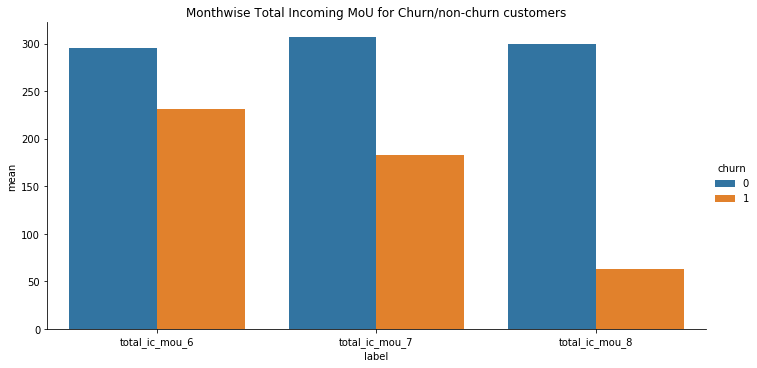

In [59]:
sns.catplot(data = df1_ic, x = 'label', y = 'mean', hue = 'churn', kind = 'bar', aspect = 2);
plt.title('Monthwise Total Incoming MoU for Churn/non-churn customers');

#### We can observe that total incoming minute of usage for 'Churn' customers are declining from 6th month to 8th month

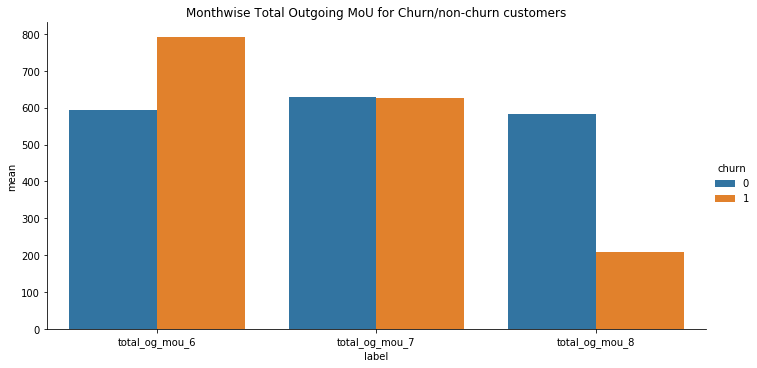

In [60]:
sns.catplot(data = df1_og, x = 'label', y = 'mean', hue = 'churn', kind = 'bar', aspect = 2);
plt.title('Monthwise Total Outgoing MoU for Churn/non-churn customers');

#### We can observe that total outgoing minute of usage for 'Churn' customers are declining from 6th month to 8th month

In [61]:
df_arpu = telco.groupby('churn')['arpu_6', 'arpu_7', 'arpu_8'].mean()
df1_arpu = df_arpu.stack().reset_index()
df1_arpu.rename(columns= {'level_1': 'label', 0: 'mean'}, inplace=True)

In [62]:
df1_arpu

,churn,label,mean
0,0,arpu_6,549.220390
1,0,arpu_7,562.608191
2,0,arpu_8,532.635710
3,1,arpu_6,663.158246
4,1,arpu_7,540.165968
5,1,arpu_8,237.200793


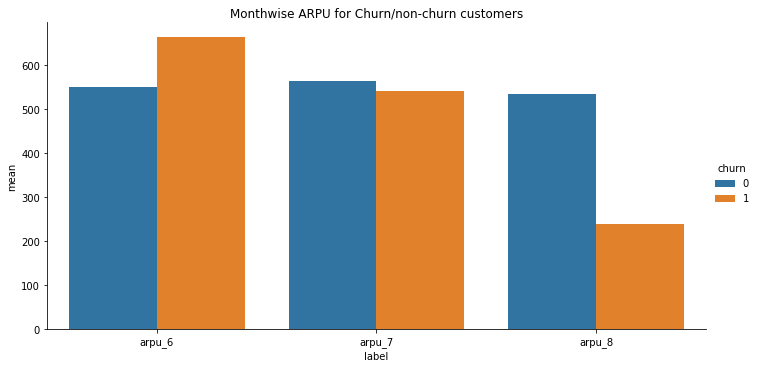

In [63]:
# analyzing the patter of arpu for each month
sns.catplot(data = df1_arpu, x = 'label', y = 'mean', hue = 'churn', kind = 'bar', aspect = 2);
plt.title('Monthwise ARPU for Churn/non-churn customers');

#### We can observe that  ARPU  for 'Churn' customers are declining from 6th month to 8th month

### Checking for outliers

In [64]:
telco.describe(percentiles = [0.25,0.5,0.75,0.9,0.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_recharge_amount_6,total_recharge_amount_7,total_recharge_amount_8,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,254.080388,255.116292,235.728174,347.125955,363.984508,307.379315,2.171525,2.105743,1.948970,5.818270,7.108646,6.557204,0.661092,0.042905,0.057607,609.866251,628.366047,551.678812,231.153776,234.307412,223.264679,46.789434,49.046114,44.401653,289.950496,296.756987,279.922931,0.061035,0.019765,0.026567,10.784689,11.875796,10.998257,1.153449,1.500338,1.224455,11.851005,11.718843,9.972868,169.284824,172.201727,160.144462,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998,0.174494,0.183261,0.153628,1.066064,1.214026,1.054865,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,1209.368754,169.138860,178.872765,158.523962,1116.509509,1188.731748,1047.618398,0.081364
std,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,482.523558,498.923555,482.062509,76.302156,75.785903,74.125281,116.205525,96.100428,104.719009,378.339061,375.418979,363.370172,608.629048,639.799336,608.976504,45.852190,45.545227,44.712024,17.567237,21.788304,20.311857,4.107960,2.676794,3.315125,690.873430,717.219171,700.478180,314.821196,315.995071,308.315153,137.501469,148.161116,138.813305,365.523475,373.747232,361.175175,0.188058,0.181859,0.110697,76.729297,80.179312,70.600636,13.985934,15.997307,12.783238,9.429132,9.432418,9.274370,175.315958,181.390742,173.207799,330.530793,331.548010,313.384838,913.747778,915.525911,919.021056,0.434953,0.450423,0.406486,2.507197,2.736158,2.535940,0.613199,0.659125,0.617549,0.985674,1.089929,1.100107,957.677989,420.974354,443.544138,416.734860,1566.112291,1632.174907,1804.608844,0.273398
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [65]:
# From that above details we can see that most of the columns have oultiers after the 99 percentile.
# so we can use capping to get rid of outliers

In [66]:
## capping the outlier
for col in telco.columns.to_list():     
    quant_99 = telco[col].quantile([0.99]).values[0]
    telco[col] = np.where(telco[col] > quant_99, quant_99, telco[col])

In [67]:
telco.describe(percentiles = [0,0.25,0.5,0.75,0.9,0.95,.99]) 

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_recharge_amount_6,total_recharge_amount_7,total_recharge_amount_8,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,548.570326,550.742827,498.170966,252.166035,258.623657,224.895572,365.893079,369.516995,325.038955,13.572928,9.636307,9.763929,22.732495,16.688892,15.985223,246.626435,247.287914,228.611178,337.942800,354.112553,296.480381,0.693781,0.691429,0.488093,5.261622,6.396756,5.806187,0.581238,0.0,0.0,600.227187,617.711709,540.665684,224.296345,227.404391,216.864380,41.752660,43.687036,39.148083,282.701431,289.321139,273.065375,0.058974,0.016047,0.024581,7.656203,8.448850,7.839783,0.677667,0.879645,0.729986,11.704010,11.580247,9.838472,166.714843,169.124896,157.216026,119.124600,117.212448,98.017343,319.678307,346.453318,327.562323,0.173094,0.181627,0.151895,1.035465,1.173661,1.019133,0.208760,0.216326,0.201260,0.172461,0.192027,0.155628,1208.699510,160.497302,169.690165,149.463829,1066.954470,1134.028256,987.425297,0.081364
std,358.973048,361.427099,383.436174,403.510223,418.167038,390.856953,434.200835,443.919067,409.754119,49.336952,38.699269,38.946961,79.312550,62.862903,60.492319,326.690254,321.464759,309.705347,555.902659,581.283814,536.473433,4.394144,4.337086,3.244853,11.204093,12.753646,11.823074,1.533902,0.0,0.0,638.785041,658.719357,632.158724,267.071897,268.564045,265.068346,84.399518,89.308094,82.358253,316.366871,323.229440,316.210752,0.137337,0.071306,0.092993,30.291281,32.289222,31.191011,2.654238,3.437941,2.882018,8.469222,8.649545,8.489949,152.024790,155.195252,145.444089,270.509848,270.247631,244.540632,670.842699,709.263624,696.964693,0.426854,0.441109,0.395171,2.314420,2.496833,2.306650,0.545146,0.561665,0.543593,0.595754,0.700731,0.599621,955.810345,355.860722,376.269235,346.491530,970.211131,1093.450162,1099.821740,0.273398
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [68]:
# we still have negative outliers in the arpu columns. 
# We can remove these using flooring
cols = ['arpu_6','arpu_7','arpu_8']
for col in cols:     
    telco[col] = np.where(telco[col] < 0, 0, telco[col])

In [69]:
telco.describe(percentiles = [0,0.25,0.5,0.75,0.9,0.95,.99]) # no outliers now

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_recharge_amount_6,total_recharge_amount_7,total_recharge_amount_8,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,548.800283,551.077959,498.243103,252.166035,258.623657,224.895572,365.893079,369.516995,325.038955,13.572928,9.636307,9.763929,22.732495,16.688892,15.985223,246.626435,247.287914,228.611178,337.942800,354.112553,296.480381,0.693781,0.691429,0.488093,5.261622,6.396756,5.806187,0.581238,0.0,0.0,600.227187,617.711709,540.665684,224.296345,227.404391,216.864380,41.752660,43.687036,39.148083,282.701431,289.321139,273.065375,0.058974,0.016047,0.024581,7.656203,8.448850,7.839783,0.677667,0.879645,0.729986,11.704010,11.580247,9.838472,166.714843,169.124896,157.216026,119.124600,117.212448,98.017343,319.678307,346.453318,327.562323,0.173094,0.181627,0.151895,1.035465,1.173661,1.019133,0.208760,0.216326,0.201260,0.172461,0.192027,0.155628,1208.699510,160.497302,169.690165,149.463829,1066.954470,1134.028256,987.425297,0.081364
std,358.144697,360.443565,383.295094,403.510223,418.167038,390.856953,434.200835,443.919067,409.754119,49.336952,38.699269,38.946961,79.312550,62.862903,60.492319,326.690254,321.464759,309.705347,555.902659,581.283814,536.473433,4.394144,4.337086,3.244853,11.204093,12.753646,11.823074,1.533902,0.0,0.0,638.785041,658.719357,632.158724,267.071897,268.564045,265.068346,84.399518,89.308094,82.358253,316.366871,323.229440,316.210752,0.137337,0.071306,0.092993,30.291281,32.289222,31.191011,2.654238,3.437941,2.882018,8.469222,8.649545,8.489949,152.024790,155.195252,145.444089,270.509848,270.247631,244.540632,670.842699,709.263624,696.964693,0.426854,0.441109,0.395171,2.314420,2.496833,2.306650,0.545146,0.561665,0.543593,0.595754,0.700731,0.599621,955.810345,355.860722,376.269235,346.491530,970.211131,1093.450162,1099.821740,0.273398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [70]:
# Scaling
telco.dtypes

arpu_6                     float64
arpu_7                     float64
arpu_8                     float64
onnet_mou_6                float64
onnet_mou_7                float64
onnet_mou_8                float64
offnet_mou_6               float64
offnet_mou_7               float64
offnet_mou_8               float64
roam_ic_mou_6              float64
roam_ic_mou_7              float64
roam_ic_mou_8              float64
roam_og_mou_6              float64
roam_og_mou_7              float64
roam_og_mou_8              float64
loc_og_mou_6               float64
loc_og_mou_7               float64
loc_og_mou_8               float64
std_og_mou_6               float64
std_og_mou_7               float64
std_og_mou_8               float64
isd_og_mou_6               float64
isd_og_mou_7               float64
isd_og_mou_8               float64
spl_og_mou_6               float64
spl_og_mou_7               float64
spl_og_mou_8               float64
og_others_6                float64
og_others_7         

In [71]:
# splitting data into train and test data set
df_train,df_test = train_test_split(telco,train_size=0.7,test_size=0.3,random_state=100)

In [72]:
df_train['churn'].value_counts()
# Since the Data is imbalanced(churns in minority) we need to handle it.

0.0    19309
1.0     1691
Name: churn, dtype: int64

In [73]:
y_train = df_train.pop('churn')
X_train = df_train

In [74]:
# we will use randomoversampler  from imblearn.over_sampling 
from imblearn.over_sampling import RandomOverSampler

In [75]:
oversample = RandomOverSampler(sampling_strategy='minority' ,random_state= 100)

In [76]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [77]:
y_test = df_test.pop('churn')
X_test = df_test

In [78]:
X_train.shape

(38618, 82)

In [79]:
y_train.value_counts()
# Now the data is balanced

1.0    19309
0.0    19309
Name: churn, dtype: int64

In [80]:
X_test.shape

(9001, 82)

In [81]:
cols=X_train.columns.to_list()

In [82]:
scaler = MinMaxScaler()

# fitting and transforming the scaler on train
X_train[cols] = scaler.fit_transform(X_train[cols])

In [83]:
#transforming the scaler on test data set
X_test[cols] = scaler.transform(X_test[cols])

In [84]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_recharge_amount_6,total_recharge_amount_7,total_recharge_amount_8
0,0.547244,0.455263,0.298307,0.002644,0.003760,0.002242,0.065291,0.065955,0.044712,0.084570,0.095058,0.110245,0.011551,0.032787,0.023090,0.015782,0.021753,0.014830,0.000951,0.003804,0.004788,1.0,1.000000,1.0,0.000000,0.112456,0.015530,0.000000,0.0,0.0,0.047401,0.046605,0.028896,0.106256,0.123576,0.105804,0.031891,0.055608,0.106709,0.249474,0.197851,0.154472,0.000000,0.0,0.0,1.000000,0.575702,0.234064,0.000000,0.078089,0.000000,0.170213,0.104167,0.066667,0.398,0.459,0.240799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.234893,0.124529,0.096538
1,0.258604,0.155840,0.183289,0.067336,0.022634,0.018855,0.138044,0.094417,0.121019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197933,0.123318,0.172497,0.040801,0.015944,0.006966,0.0,0.000000,0.0,0.000000,0.217151,0.000000,0.000000,0.0,0.0,0.145852,0.084573,0.095077,0.178525,0.188194,0.201209,0.146637,0.079216,0.041304,0.231830,0.190007,0.185800,0.000000,0.0,0.0,0.232007,0.045681,0.023920,0.353353,0.053613,0.008368,0.170213,0.145833,0.111111,0.110,0.120,0.136698,0.006539,0.091638,0.234130,0.092145,0.035526,0.043454,0.0,0.0,0.0,0.166667,0.250000,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.624316,0.093684,0.071408,0.141289,0.153529,0.116850,0.085974
2,0.150276,0.157129,0.157759,0.032220,0.035010,0.038571,0.143262,0.123763,0.097276,0.051775,0.150752,0.242425,0.043319,0.048633,0.179589,0.131284,0.135821,0.092542,0.052745,0.040869,0.023847,0.0,0.004298,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.118803,0.107990,0.068305,0.068843,0.112247,0.137193,0.060143,0.073508,0.129048,0.077407,0.125585,0.171101,0.000000,0.0,0.0,0.000000,0.058471,0.056533,0.000000,0.000000,0.598791,0.170213,0.187500,0.222222,0.128,0.120,0.136698,0.000058,0.000090,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.083333,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.895707,0.000000,0.000000,0.000000,0.063125,0.101215,0.052817
3,0.622211,0.161875,0.355095,1.000000,0.075315,0.323022,0.202015,0.083343,0.253081,0.000000,0.141767,0.080832,0.000000,0.076404,0.055172,0.175532,0.114612,0.608043,0.913530,0.046511,0.073353,0.0,0.000000,0.0,0.466686,0.000000,0.207680,0.000000,0.0,0.0,0.892927,0.101574,0.381678,0.122239,0.246819,1.000000,1.000000,0.211068,0.036132,0.917610,0.275595,0.871195,0.234375,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297872,0.187500,0.222222,0.110,0.130,0.136698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.369922,0.000000,0.000000,0.000000,0.199841,0.048862,0.095364
4,0.220585,0.228816,0.132992,0.008193,0.020872,0.011065,0.080310,0.125290,0.037234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111964,0.188278,0.056338,0.001523,0.006019,0.004290,0.0,0.000000,0.0,0.038136,0.053663,0.021177,0.293588,0.0,0.0,0.065625,0.106688,0.033250,0.340775,

In [85]:
X_train.shape

(38618, 82)

In [86]:
X_test.shape

(9001, 82)

### Using RFE to get top 15 features

In [87]:
# using RFE to get top 15 features
lm  = LogisticRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [88]:
rfe_col=list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_col

[('arpu_6', True, 1),
 ('arpu_7', False, 16),
 ('arpu_8', False, 31),
 ('onnet_mou_6', False, 20),
 ('onnet_mou_7', False, 60),
 ('onnet_mou_8', False, 4),
 ('offnet_mou_6', False, 22),
 ('offnet_mou_7', False, 25),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_6', False, 61),
 ('roam_ic_mou_7', False, 39),
 ('roam_ic_mou_8', False, 53),
 ('roam_og_mou_6', False, 41),
 ('roam_og_mou_7', False, 2),
 ('roam_og_mou_8', False, 7),
 ('loc_og_mou_6', False, 19),
 ('loc_og_mou_7', False, 43),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', False, 21),
 ('std_og_mou_7', False, 51),
 ('std_og_mou_8', False, 6),
 ('isd_og_mou_6', False, 63),
 ('isd_og_mou_7', False, 62),
 ('isd_og_mou_8', False, 58),
 ('spl_og_mou_6', False, 59),
 ('spl_og_mou_7', False, 44),
 ('spl_og_mou_8', False, 52),
 ('og_others_6', False, 36),
 ('og_others_7', False, 67),
 ('og_others_8', False, 68),
 ('total_og_mou_6', False, 40),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_mou_6', False, 10),
 ('lo

In [89]:
rfe_col=X_train.columns[rfe.support_]
rfe_col
## balanced

Index(['arpu_6', 'loc_og_mou_8', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'vbc_3g_8'],
      dtype='object')

In [90]:
#Assigning top coulmns to X_train_rfe
X_train_rfe=X_train[rfe_col]

## Modeling

### Creating Logistic model from RFE features

In [91]:
# Model1: Logistic
X_train_lm=sm.add_constant(X_train_rfe)
lr1=sm.GLM(y_train,X_train_lm,family = sm.families.Binomial())
res1=lr1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16675.
Date:                Tue, 25 Aug 2020   Deviance:                       33350.
Time:                        18:43:55   Pearson chi2:                 1.20e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9233      0.031     29.773      0.000       0.862       0.984
arpu_6               1.6093      0.081     19.990      0.000       1.451       1.767
loc_og_mou_8        -3.4169      0.197    -17.379      0.000      -3.802      -3.032
total_og_mou_7       1.7181      0.126     13.652      0.000       1.471       1.965
total_og_mou_8      -3.4773      0.165    -21.139      0.000      -3.800      -3.155
loc_ic_mou_8        -7.7922      0.257    -30.290      0.000      -8.296      -7.288
std_ic_mou_8        -2.0927      0.144    -14.542      0.000      -2.375      -1.811
total_ic_mou_7       2.1856      0.164     13.353      0.000       1.865       2.506
spl_ic_mou_8        -2.6432      0.152    -17.364      0.000      -2.942      -2.345
total_rech_num_7     1.6327      0.127     12.810      0.000       1.383       1.883
total_rech_num_8    -3.0503      0.155    -19.713      0.000      -3.354      -2.747
vol_2g_mb_8         -1.6065      0.150    -10.700      0.000      -1.901      -1.312
monthly_2g_8        -2.6268      0.123    -21.302      0.000      -2.868      -2.385
sachet_2g_8         -2.5168      0.130    -19.363      0.000      -2.772      -2.262
monthly_3g_8        -1.9368      0.108    -17.890      0.000      -2.149      -1.725
vbc_3g_8            -1.5638      0.129    -12.126      0.000      -1.817      -1.311
====================================================================================
"""

In [92]:
y_train_pred = res1.predict(X_train_lm)
y_train_pred[:10]

0    0.747293
1    0.181308
2    0.345375
3    0.000131
4    0.088156
5    0.042470
6    0.059483
7    0.023385
8    0.187398
9    0.464045
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.47292938e-01, 1.81308123e-01, 3.45375057e-01, 1.30632191e-04,
       8.81558957e-02, 4.24698931e-02, 5.94833791e-02, 2.33853957e-02,
       1.87397943e-01, 4.64045115e-01])

In [94]:
# creating a dataframe with the actual churn flag and the predicted probabilities 
y_train_pred_final = pd.DataFrame({'Actual_Churn': y_train.values,'Churn_prob': y_train_pred})
len(y_train_pred_final[(y_train_pred_final['Actual_Churn']==1) & (y_train_pred_final['Churn_prob']>0.5)])

16222

In [95]:
len(y_train_pred_final[(y_train_pred_final['Actual_Churn']==1) & (y_train_pred_final['Churn_prob']>0.5)])/len(y_train_pred_final[(y_train_pred_final['Actual_Churn']==1)])
# 84% of the actual churn have predcted probability greater that 0.5

0.8401263659433424

In [96]:
#creating new column 'predicted' with 1 if prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(5)

,Actual_Churn,Churn_prob,Predicted
0,0.0,0.747293,1
1,0.0,0.181308,0
2,0.0,0.345375,0
3,0.0,0.000131,0
4,0.0,0.088156,0


In [97]:
#overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Actual_Churn,y_train_pred_final.Predicted))

0.81599254233777


In [98]:
# Calculate the VIFs for the Model1
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_num_8,5.92
8,total_rech_num_7,5.49
3,total_og_mou_8,4.92
2,total_og_mou_7,4.63
4,loc_ic_mou_8,3.91
6,total_ic_mou_7,3.87
1,loc_og_mou_8,2.79
0,arpu_6,2.54
14,vbc_3g_8,1.62
12,sachet_2g_8,1.57


In [99]:
# total_rech_num_8 has VIF  > 5 , so dropping the column
rfe_col = rfe_col.drop('total_rech_num_8' ,1)

In [100]:
rfe_col

Index(['arpu_6', 'loc_og_mou_8', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_7', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'vbc_3g_8'],
      dtype='object')

In [101]:
# Model2: Logistic
# re-run the model
X_train_rfe = X_train_rfe[rfe_col]

X_train_lm=sm.add_constant(X_train_rfe)
lr2=sm.GLM(y_train,X_train_lm,family = sm.families.Binomial())
res2=lr2.fit()
res2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38603
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16882.
Date:                Tue, 25 Aug 2020   Deviance:                       33764.
Time:                        18:43:57   Pearson chi2:                 1.32e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9494      0.031     30.766      0.000       0.889       1.010
arpu_6               1.4926      0.080     18.667      0.000       1.336       1.649
loc_og_mou_8        -3.4694      0.199    -17.397      0.000      -3.860      -3.079
total_og_mou_7       2.3697      0.123     19.332      0.000       2.129       2.610
total_og_mou_8      -4.9551      0.151    -32.779      0.000      -5.251      -4.659
loc_ic_mou_8        -8.2034      0.259    -31.624      0.000      -8.712      -7.695
std_ic_mou_8        -2.3435      0.144    -16.219      0.000      -2.627      -2.060
total_ic_mou_7       2.5553      0.162     15.752      0.000       2.237       2.873
spl_ic_mou_8        -2.8235      0.151    -18.674      0.000      -3.120      -2.527
total_rech_num_7    -0.1044      0.086     -1.215      0.224      -0.273       0.064
vol_2g_mb_8         -1.6273      0.149    -10.915      0.000      -1.920      -1.335
monthly_2g_8        -2.7220      0.123    -22.095      0.000      -2.963      -2.481
sachet_2g_8         -3.1586      0.125    -25.304      0.000      -3.403      -2.914
monthly_3g_8        -2.0978      0.108    -19.454      0.000      -2.309      -1.886
vbc_3g_8            -1.5613      0.129    -12.141      0.000      -1.813      -1.309
====================================================================================
"""

In [102]:
y_train_pred = res2.predict(X_train_lm).values.reshape(-1)
y_train_pred[:10]

array([7.42449265e-01, 1.67796751e-01, 4.11828935e-01, 7.59501955e-05,
       7.02517136e-02, 4.14321750e-02, 6.69360240e-02, 2.98000537e-02,
       1.79996710e-01, 5.11036123e-01])

In [103]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [104]:
#creating new column 'predicted' with 1 if prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(5)

,Actual_Churn,Churn_prob,Predicted
0,0.0,0.742449,1
1,0.0,0.167797,0
2,0.0,0.411829,0
3,0.0,0.000076,0
4,0.0,0.070252,0


In [105]:
#overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Actual_Churn,y_train_pred_final.Predicted))

0.8148790719353669


In [106]:
# Calculate the VIFs for the Model2
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_7,4.30
4,loc_ic_mou_8,3.85
3,total_og_mou_8,3.81
6,total_ic_mou_7,3.81
8,total_rech_num_7,2.93
1,loc_og_mou_8,2.78
0,arpu_6,2.53
13,vbc_3g_8,1.62
5,std_ic_mou_8,1.53
12,monthly_3g_8,1.50


In [107]:
# # create columns with diff prob cut-offs
numbers = [float(x)/10 for x in range(10)]
numbers
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(5)

,Actual_Churn,Churn_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.742449,1,1,1,1,1,1,1,1,1,0,0
1,0.0,0.167797,0,1,1,0,0,0,0,0,0,0,0
2,0.0,0.411829,0,1,1,1,1,1,0,0,0,0,0
3,0.0,0.000076,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.070252,0,1,0,0,0,0,0,0,0,0,0


In [108]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.661401  0.969289  0.353514
0.2   0.2  0.726345  0.948884  0.503807
0.3   0.3  0.767000  0.922679  0.611321
0.4   0.4  0.799057  0.891916  0.706199
0.5   0.5  0.814879  0.843493  0.786265
0.6   0.6  0.819644  0.782588  0.856699
0.7   0.7  0.810969  0.707805  0.914133
0.8   0.8  0.725361  0.491740  0.958983
0.9   0.9  0.584727  0.179813  0.989642


In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

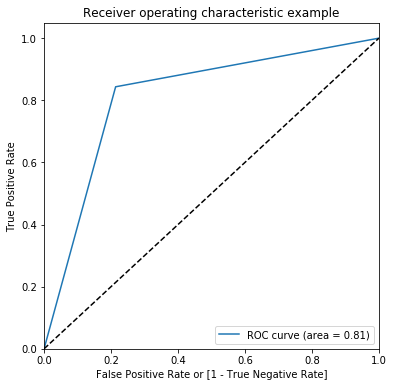

(array([0.        , 0.21373453, 1.        ]),
 array([0.        , 0.84349267, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [110]:
draw_roc(y_train_pred_final.Actual_Churn, y_train_pred_final.Predicted)

In [111]:
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Actual_Churn, y_train_pred_final.Churn_prob))

'0.89'

### Model Prediction

In [112]:
X_test[rfe_col].shape

(9001, 14)

In [113]:
X_train_lm.shape

(38618, 15)

In [114]:
X_test_rfe=sm.add_constant(X_test[rfe_col])

In [115]:
y_test_pred = res2.predict(X_test_rfe).values.reshape(-1)
y_test_pred[:10]

array([0.73994894, 0.55246573, 0.04483858, 0.45988025, 0.89177528,
       0.09238178, 0.27664948, 0.18668289, 0.04582573, 0.32624919])

In [116]:
# creating a dataframe with the actual churn flag and the predicted probabilities 
y_test_pred_final = pd.DataFrame({'Actual_Churn': y_test.values,'Churn_prob': y_test_pred})

In [117]:
#creating new column 'predicted' with 1 if prob > 0.5 else 0
y_test_pred_final['Predicted'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head(5)

#overall accuracy
print(metrics.accuracy_score(y_test_pred_final.Actual_Churn,y_test_pred_final.Predicted))

0.7972447505832685


In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

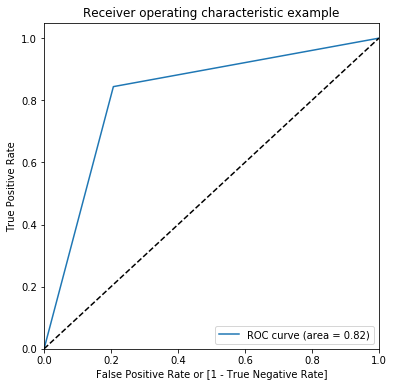

(array([0.        , 0.20700521, 1.        ]),
 array([0.   , 0.844, 1.   ]),
 array([2, 1, 0], dtype=int64))

In [119]:
draw_roc(y_test_pred_final.Actual_Churn, y_test_pred_final.Predicted)

In [120]:
"{:2.2f}".format(metrics.roc_auc_score(y_test_pred_final.Actual_Churn, y_test_pred_final.Churn_prob))

'0.89'

In [121]:
# create confusion matrix
cm = confusion_matrix(y_test_pred_final.Actual_Churn, y_test_pred_final.Predicted) 
print(cm)

# check sensitivity and specificity
speci = cm[0,0]/(cm[0,0]+cm[0,1])
sensi = cm[1,1]/(cm[1,0]+cm[1,1])
print("Sensitivity: \t", round(sensi, 2), "\n", "Specificity: \t", round(speci, 2), sep='') 

[[6543 1708]
 [ 117  633]]
Sensitivity: 	0.84
Specificity: 	0.79


In [122]:
#overall accuracy
print(metrics.accuracy_score(y_test_pred_final.Actual_Churn,y_test_pred_final.Predicted))

0.7972447505832685


#### Prob of 0.5 has accuracy of 79%, Sensitivity 84% and Specifictiy of 79% 
Since we would want the prediction of  correctly Churn customers to be maximum while keeping  balanced accuracy and specificity, We will go with the above model with 0.5 as the cut-off.

We see an overall AUC score of 0.89 which looks good.

## Principal Component Analysis

In [123]:
X_train.shape

(38618, 82)

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA(random_state=100)

pca.fit(X_train)

PCA(random_state=100)

In [126]:
# Components from the PCA
pca.components_

array([[ 1.90841978e-01,  2.18035282e-01,  1.69745611e-01, ...,
         6.89140435e-03,  2.34279488e-02,  3.06198010e-02],
       [ 5.14906877e-02,  1.29462523e-01,  2.27655159e-01, ...,
         6.53908728e-02,  1.08133877e-01,  1.52511365e-01],
       [ 1.11117223e-01,  1.45909939e-01,  1.31263000e-01, ...,
         6.77043342e-02,  7.27017267e-02,  7.15609151e-02],
       ...,
       [-7.52686185e-04,  4.55863665e-03, -2.50331377e-03, ...,
        -2.20332369e-03,  7.29638836e-03, -6.82566295e-03],
       [ 0.00000000e+00,  9.51788850e-17, -4.07329437e-16, ...,
         1.18686479e-16, -1.38492535e-16,  2.55484888e-16],
       [ 0.00000000e+00,  6.45777535e-17, -2.54434213e-16, ...,
         1.65084224e-17, -4.07708864e-17,  1.13755321e-16]])

In [127]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_


array([1.51674313e-01, 9.49319735e-02, 6.40835526e-02, 6.05761495e-02,
       5.04367248e-02, 4.50597775e-02, 3.31449432e-02, 3.26782540e-02,
       2.84659790e-02, 2.48162456e-02, 2.41357557e-02, 2.22109524e-02,
       2.16373900e-02, 1.97429155e-02, 1.82974108e-02, 1.69971978e-02,
       1.60790746e-02, 1.47599319e-02, 1.36748605e-02, 1.30611842e-02,
       1.26364967e-02, 1.06860229e-02, 1.01049837e-02, 9.57700060e-03,
       9.36883494e-03, 9.08305471e-03, 8.78824869e-03, 8.41291694e-03,
       7.88503320e-03, 7.66886203e-03, 7.30455568e-03, 7.04952953e-03,
       6.82144042e-03, 6.57331103e-03, 6.16337671e-03, 5.79147262e-03,
       5.69551345e-03, 5.15907375e-03, 4.95514540e-03, 4.89525718e-03,
       4.83718104e-03, 4.31234075e-03, 4.12055267e-03, 4.03686978e-03,
       3.94109609e-03, 3.79507629e-03, 3.58932115e-03, 3.48136733e-03,
       3.37702662e-03, 3.23470780e-03, 3.10022930e-03, 2.80105816e-03,
       2.58685242e-03, 2.53962062e-03, 2.50708308e-03, 2.42327575e-03,
      

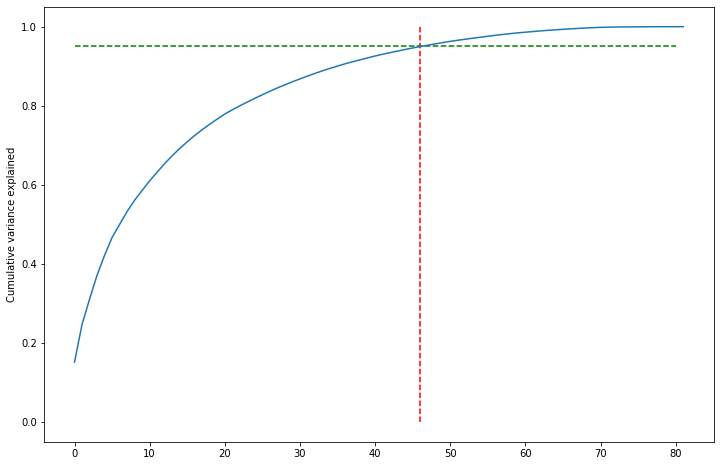

In [128]:
# Making a scree plot for the explained variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=46, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### 95% variance can be explained by  46 variables, We will perform PCA with 46 components

In [129]:
from sklearn.decomposition import IncrementalPCA

In [130]:
pca_final = IncrementalPCA(n_components=46)

df_train_pca = pca_final.fit_transform(X_train)

In [131]:
df_train_pca.shape

(38618, 46)

In [132]:
corrmat = np.corrcoef(df_train_pca.transpose()) # correlation matrix
corrmat.shape

(46, 46)

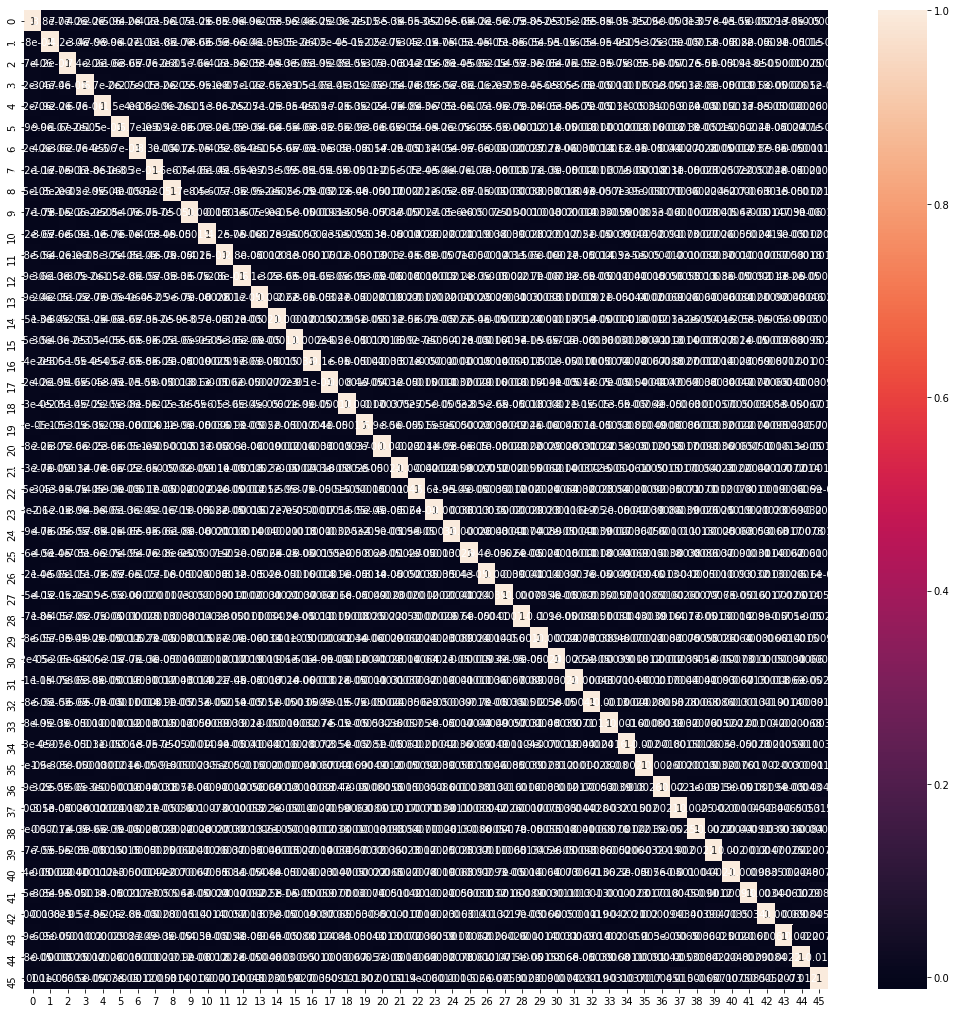

In [133]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=[18,18])
sns.heatmap(corrmat, annot=True);

### We  can observe there is almost no correlation 

##### Applying the transformation on the test set

In [134]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 46)

In [135]:
# Applying logistic regression on the data on our Principal components
lr_pca = LogisticRegression()

logm_pca = lr_pca.fit(df_train_pca, y_train)

In [136]:
# Making predictions on the test set
pred_probs_test = logm_pca.predict_proba(df_test_pca)

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

##### Hyperparamter Tuning with Logistic Regression

In [137]:

c_values = [5, 1.0, 0.5, 0.1, 0.01]

parameters =  dict(C=c_values)

n_folds = 5

lr = GridSearchCV(lr_pca, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="roc_auc")
lr.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [5, 1.0, 0.5, 0.1, 0.01]},
             return_train_score=True, scoring='roc_auc')

In [138]:
# summarize results
print("Best: %f using %s" % (lr.best_score_, lr.best_params_))
means = lr.cv_results_['mean_test_score']
stds = lr.cv_results_['std_test_score']
params = lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.893880 using {'C': 5}
0.893880 (0.001259) with: {'C': 5}
0.893852 (0.001240) with: {'C': 1.0}
0.893814 (0.001227) with: {'C': 0.5}
0.893358 (0.001140) with: {'C': 0.1}
0.888356 (0.001151) with: {'C': 0.01}


##### We can use c = 5 which gives an accuracy of 89.4%

In [139]:
# predict churn on test data
y_pred = lr.predict(df_test_pca)

In [140]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[6753 1498]
 [ 133  617]]


In [141]:
 # check sensitivity and specificity
speci = cm[0,0]/(cm[0,0]+cm[0,1])
sensi = cm[1,1]/(cm[1,0]+cm[1,1])
print("Sensitivity: \t", round(sensi, 2), "\n", "Specificity: \t", round(speci, 2), sep='') 

Sensitivity: 	0.82
Specificity: 	0.82


In [142]:
#overall accuracy
print(metrics.accuracy_score(y_test,y_pred))

0.8187979113431841


#### We got around 82% accuracy, senstivity and specificity both of 82% and the AUC is 89%. This model looks looks better that the one we did earlier without PCA.

## Creating another model using Decision Tree

In [143]:
# Importing required packages for visualization
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [144]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree. 

dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=5)

In [145]:
# Making predictions
y_pred_dt_default = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_dt_default))

              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86      8251
         1.0       0.23      0.78      0.36       750

    accuracy                           0.77      9001
   macro avg       0.60      0.78      0.61      9001
weighted avg       0.91      0.77      0.82      9001



In [146]:
# Printing confusion matrix and accuracy
confusion_tree = confusion_matrix(y_test,y_pred_dt_default)
print("Confusion Matrix: \n", confusion_tree)
print("Accuracy: \t",accuracy_score(y_test,y_pred_dt_default))

Confusion Matrix: 
 [[6322 1929]
 [ 162  588]]
Accuracy: 	 0.7676924786134874


In [147]:
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives


# sensitivity
print('Sensitivity: %0.2f ' %(TP / float(TP+FN)))

# specificity
print('Specificity: %0.2f ' %(TN / float(TN+FP)))

# false postive rate - predicting churn when customer has not churned
print('false postive rate: %0.2f'  %(FP/ float(TN+FP)))

# Precision (Positive predictive value) 
print('positive predictive value: %0.2f '  %(TP / float(TP+FP)))

# Negative predictive value
print('Negative predictive value: %0.2f ' %(TN / float(TN+ FN)))


Sensitivity: 0.78 
Specificity: 0.77 
false postive rate: 0.23
positive predictive value: 0.23 
Negative predictive value: 0.98 


####  Hyperparameter Tuning 

 ###### Tuning Max_Depth

In [148]:
n_folds = 5

# setting max_depth range from 1 to 30
parameters = {'max_depth': range(1, 30)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",  
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, return_train_score=True, 
                   scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 30)}, return_train_score=True,
             scoring='accuracy')

In [149]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.236568,0.004821,0.003789,0.000399,1,{'max_depth': 1},0.708312,0.701838,0.696789,0.697527,0.702188,0.701331,0.004119,29,0.699845,0.701593,0.702984,0.702800,0.701635,0.701771,0.001122
1,0.417883,0.005607,0.003991,0.000006,2,{'max_depth': 2},0.723071,0.712843,0.713879,0.715525,0.720316,0.717127,0.003923,28,0.716223,0.718327,0.718198,0.717786,0.716588,0.717425,0.000859
2,0.592622,0.008467,0.003592,0.000490,3,{'max_depth': 3},0.756473,0.751813,0.751683,0.747378,0.755406,0.752551,0.003212,27,0.753026,0.754256,0.753739,0.752484,0.753261,0.753353,0.000606
3,0.757176,0.008448,0.003790,0.000399,4,{'max_depth': 4},0.770067,0.758804,0.765277,0.762139,0.772368,0.765731,0.004979,26,0.768984,0.772092,0.769535,0.767050,0.772358,0.770004,0.001994
4,0.904193,0.005136,0.003978,0.000015,5,{'max_depth': 5},0.797126,0.784827,0.791429,0.794769,0.790496,0.791729,0.004186,25,0.797339,0.797987,0.799217,0.800065,0.796310,0.798183,0.001332


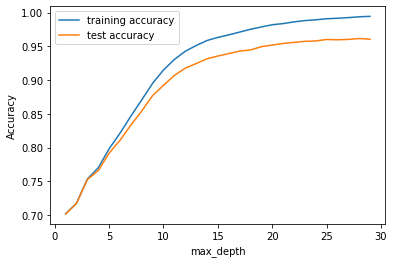

In [150]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

In [151]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    return_train_score=True,  
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [152]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.100979,0.042155,0.004999,0.000014,5,{'min_samples_leaf': 5},0.950026,0.942387,0.944200,0.949501,0.947171,0.946657,0.002966,1,0.982424,0.981000,0.980870,0.982327,0.980418,0.981408,0.000814
1,1.724986,0.047062,0.004790,0.000400,25,{'min_samples_leaf': 25},0.889177,0.878301,0.883610,0.880487,0.887479,0.883811,0.004091,2,0.912604,0.911892,0.913543,0.911021,0.910924,0.911997,0.000987
2,1.622459,0.026391,0.004388,0.000488,45,{'min_samples_leaf': 45},0.861989,0.854221,0.855645,0.856015,0.860676,0.857709,0.003047,3,0.879815,0.880786,0.885382,0.880110,0.882084,0.881636,0.002030
3,1.556837,0.026731,0.004789,0.000400,65,{'min_samples_leaf': 65},0.846582,0.837260,0.851631,0.849929,0.845526,0.846186,0.004978,4,0.864148,0.861753,0.867418,0.863246,0.863473,0.864008,0.001876
4,1.464302,0.025668,0.004390,0.000488,85,{'min_samples_leaf': 85},0.837649,0.833635,0.830140,0.840347,0.835686,0.835491,0.003474,5,0.856963,0.855376,0.853920,0.852403,0.849717,0.853676,0.002492


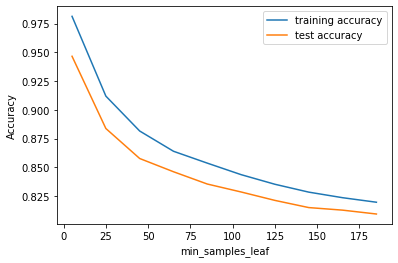

In [153]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Tuning min_samples_split

In [154]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    return_train_score=True,  
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [155]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.333759,0.026821,0.005387,0.000481,5,{'min_samples_split': 5},0.964526,0.962973,0.966209,0.966464,0.962968,0.964628,0.001508,1,0.999871,1.000000,0.999935,0.999935,0.999903,0.999929,0.000043
1,2.325978,0.033037,0.005190,0.000396,25,{'min_samples_split': 25},0.949896,0.952486,0.954169,0.950278,0.950408,0.951447,0.001633,2,0.984398,0.988444,0.990257,0.985596,0.985661,0.986871,0.002151
2,2.328576,0.032319,0.005381,0.000483,45,{'min_samples_split': 45},0.936691,0.933325,0.936044,0.935647,0.940438,0.936429,0.002304,3,0.970091,0.971159,0.973490,0.970675,0.974300,0.971943,0.001649
3,2.317000,0.029549,0.005587,0.000799,65,{'min_samples_split': 65},0.923097,0.925686,0.921543,0.922439,0.926712,0.923896,0.001971,4,0.954587,0.958924,0.958277,0.957016,0.958537,0.957468,0.001576
4,2.307428,0.032578,0.005392,0.000496,85,{'min_samples_split': 85},0.909632,0.909114,0.907820,0.909621,0.913894,0.910016,0.002048,5,0.940474,0.942060,0.945167,0.942029,0.944554,0.942857,0.001745


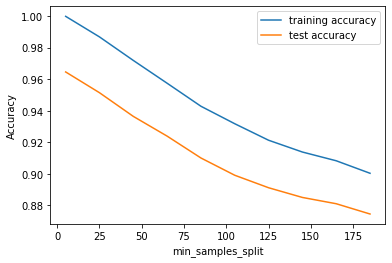

In [156]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Grid Search to Find Optimal Hyperparameters

In [157]:
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(5, 15, 5),
              'min_samples_leaf': range(5, 50, 10),
              'min_samples_split': range(5,50, 10),
              'criterion': ["entropy", "gini"]}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    return_train_score=True,  
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 50, 10),
                         'min_samples_split': range(5, 50, 10)},
             return_train_score=True, scoring='accuracy')

In [158]:
# cv results
cv_results = pd.DataFrame(tree.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.278380,0.016281,0.004189,3.992086e-04,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.793242,0.788840,0.786898,0.795546,0.794380,0.791781,0.003333,51,0.793682,0.800091,0.797469,0.797928,0.795760,0.796986,0.002153
1,1.269205,0.011009,0.003994,8.485826e-06,entropy,5,5,15,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.793242,0.788840,0.786898,0.795546,0.794380,0.791781,0.003333,51,0.793682,0.800091,0.797469,0.797928,0.795760,0.796986,0.002153
2,1.268812,0.011219,0.003984,1.249950e-05,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.793242,0.788840,0.786898,0.795546,0.794380,0.791781,0.003333,51,0.793682,0.800091,0.797469,0.797928,0.795760,0.796986,0.002153
3,1.265813,0.008681,0.003994,4.554731e-06,entropy,5,5,35,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.793242,0.788840,0.786898,0.795546,0.794380,0.791781,0.003333,51,0.793682,0.800091,0.797469,0.797928,0.795760,0.796986,0.002153
4,1.264816,0.007633,0.003996,5.346959e-06,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.793112,0.788581,0.787027,0.795546,0.793862,0.791626,0.003256,58,0.793455,0.799896,0.797242,0.797670,0.795630,0.796779,0.002149
5,1.271398,0.009301,0.003798,4.030929e-04,entropy,5,15,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.792853,0.788581,0.786380,0.795157,0.793604,0.791315,0.003292,77,0.793293,0.799896,0.796983,0.797572,0.795469,0.796643,0.002198
6,1.268007,0.012304,0.004000,1.237243e-05,entropy,5,15,15,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.792853,0.788581,0.786380,0.795157,0.793604,0.791315,0.003292,77,0.793293,0.799896,0.796983,0.797572,0.795469,0.796643,0.002198
7,1.277184,0.014239,0.004190,3.980895e-04,entropy,5,15,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.792853,0.788581,0.786380,0.795157,0.793604,0.791315,0.003292,77,0.793293,0.799896,0.796983,0.797572,0.795469,0.796643,0.002198
8,1.279577,0.009315,0.003990,4.862804e-07,entropy,5,15,35,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.792853,0.788581,0.786380,0.795157,0.793604,0.791315,0.003292,77,0.793293,0.799896,0.796983,0.797572,0.795469,0.796643,0.002198
9,1.277183,0.014961,0.003998,1.025765e-05,entropy,5,15,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.792853,0.788581,0.786639,0.795416,0.793604,0.791419,0.003277,61,0.793293,0.799896,0.796951,0.797475,0.795469,0.796617,0.002189


In [159]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy: %0.2f" %(tree.best_score_))
print(tree.best_estimator_)

best accuracy: 0.89
DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=100)


In [160]:
# model with optimal hyperparameters
dt_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
dt_gini.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [161]:
# accuracy score
dt_gini.score(df_test_pca,y_test)

0.8239084546161538

In [162]:
y_pred_dt_hyper = dt_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_dt_hyper)
confusion_tree_hyper

array([[6906, 1345],
       [ 240,  510]], dtype=int64)

In [163]:
# Printing confusion matrix and accuracy
print("Confusion Matrix: \n", confusion_tree_hyper)
print("Accuracy: ",accuracy_score(y_test,y_pred_dt_hyper))

TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives


# sensitivity
print('Sensitivity: %0.2f ' %(TP / float(TP+FN)))

# specificity
print('Specificity: %0.2f ' %(TN / float(TN+FP)))

# false postive rate - predicting churn when customer has not churned
print('false postive rate: %0.2f'  %(FP/ float(TN+FP)))

# Precision (Positive predictive value) 
print('positive predictive value: %0.2f '  %(TP / float(TP+FP)))

# Negative predictive value
print('Negative predictive value: %0.2f ' %(TN / float(TN+ FN)))


Confusion Matrix: 
 [[6906 1345]
 [ 240  510]]
Accuracy:  0.8239084546161538
Sensitivity: 0.68 
Specificity: 0.84 
false postive rate: 0.16
positive predictive value: 0.27 
Negative predictive value: 0.97 


## Creating another model using Random Forest 

In [164]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [165]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [166]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier()

In [167]:
# Making predictions
y_test_pred_rf = rfc.predict(df_test_pca)

In [168]:
# Checking the report of default model
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      8251
         1.0       0.59      0.25      0.35       750

    accuracy                           0.92      9001
   macro avg       0.76      0.61      0.65      9001
weighted avg       0.91      0.92      0.91      9001



In [169]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_rf))

[[8123  128]
 [ 566  184]]


In [170]:
print(accuracy_score(y_test,y_test_pred_rf))

0.9228974558382402


### Hyperparameter Tuning

#### Tuning max_depth

In [171]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(5, 30, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': range(5, 30, 5)}, return_train_score=True,
             scoring='accuracy')

In [172]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.529301,0.057914,0.088368,0.001024,5,{'max_depth': 5},0.836613,0.831305,0.834801,0.833225,0.831024,0.833394,0.002114,5,0.838707,0.840940,0.838156,0.839003,0.837158,0.838793,0.001244
1,13.964025,0.093085,0.136629,0.001089,10,{'max_depth': 10},0.939798,0.933195,0.935137,0.930985,0.931115,0.934046,0.003255,4,0.948372,0.947724,0.945523,0.946820,0.945849,0.946858,0.001081
2,16.737455,0.078217,0.170341,0.000757,15,{'max_depth': 15},0.974883,0.972683,0.976955,0.975787,0.971773,0.974416,0.001925,3,0.986243,0.987020,0.985434,0.986114,0.986017,0.986166,0.000509
3,18.469395,0.978293,0.204653,0.020704,20,{'max_depth': 20},0.984593,0.980451,0.986018,0.982779,0.981743,0.983117,0.001985,2,0.994983,0.994853,0.994821,0.994692,0.994465,0.994763,0.000175
4,21.350079,3.696657,0.234784,0.058271,25,{'max_depth': 25},0.987571,0.984205,0.988866,0.987570,0.985239,0.986690,0.001707,1,0.998511,0.998479,0.998641,0.998479,0.998285,0.998479,0.000114


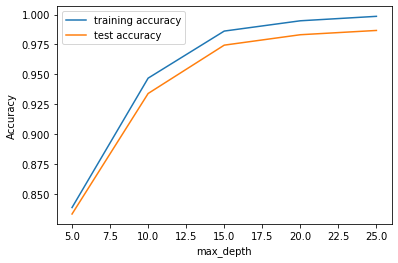

In [173]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning  n-estimators

In [174]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=100),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [175]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.103433,0.428614,0.079784,0.008834,50,{'n_estimators': 50},0.935137,0.930735,0.936432,0.930726,0.930985,0.932803,0.002470,4,0.944941,0.946300,0.944099,0.945137,0.946302,0.945356,0.000847
1,13.007392,1.761241,0.118296,0.009762,75,{'n_estimators': 75},0.936820,0.931512,0.936950,0.932151,0.929950,0.933476,0.002874,3,0.945006,0.946268,0.945556,0.945849,0.945428,0.945621,0.000422
2,18.297819,2.140658,0.161168,0.019753,100,{'n_estimators': 100},0.939798,0.933195,0.935137,0.930985,0.931115,0.934046,0.003255,1,0.948372,0.947724,0.945523,0.946820,0.945849,0.946858,0.001081
3,19.542543,2.907264,0.176929,0.001849,125,{'n_estimators': 125},0.939410,0.932289,0.934619,0.931115,0.931633,0.933813,0.003044,2,0.947595,0.947498,0.945070,0.945493,0.945784,0.946288,0.001053


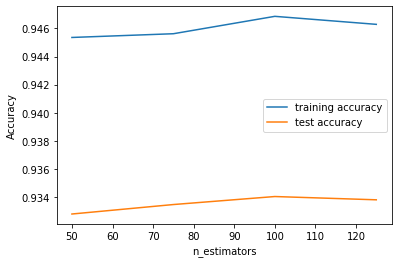

In [176]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

n_estimator = 100 seems good

#### Tuning max_features

In [177]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 12, 16, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,  
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=100),
             param_grid={'max_features': [4, 8, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [178]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.628177,1.101676,0.236319,0.042241,4,{'max_features': 4},0.938633,0.932548,0.935008,0.931892,0.930726,0.933761,0.002809,6,0.947401,0.947271,0.945103,0.945881,0.945234,0.946178,0.000982
1,30.178563,0.948137,0.228225,0.021459,8,{'max_features': 8},0.938244,0.936561,0.937338,0.934740,0.931633,0.935703,0.002339,1,0.947692,0.947595,0.946883,0.948017,0.947435,0.947524,0.000373
2,46.554371,2.683666,0.255726,0.043667,12,{'max_features': 12},0.939021,0.932418,0.936691,0.933834,0.932669,0.934927,0.002548,2,0.950282,0.946980,0.947595,0.947597,0.948082,0.948107,0.001142
3,60.378430,6.206235,0.209734,0.006354,16,{'max_features': 16},0.936561,0.933713,0.935396,0.933963,0.932410,0.934409,0.001434,5,0.947466,0.948339,0.947886,0.947532,0.949247,0.948094,0.000655
4,48.228506,5.747204,0.142817,0.001716,20,{'max_features': 20},0.935396,0.935396,0.937597,0.933705,0.932280,0.934875,0.001792,3,0.948048,0.948728,0.948793,0.947014,0.948179,0.948152,0.000640


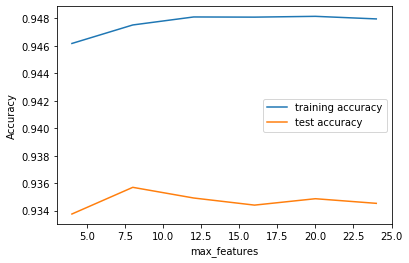

In [179]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

In [180]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,  
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=100),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [181]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.520116,0.549107,0.168361,0.065593,100,{'min_samples_leaf': 100},0.873252,0.863931,0.865355,0.869222,0.867927,0.867937,0.003244,1,0.879200,0.876513,0.877290,0.875028,0.878233,0.877253,0.001432
1,12.314025,0.133538,0.126662,0.002750,150,{'min_samples_leaf': 150},0.857198,0.852926,0.853314,0.855238,0.849799,0.853695,0.002472,2,0.862044,0.863760,0.863015,0.861790,0.859945,0.862111,0.001291
2,11.901066,0.073935,0.124069,0.002053,200,{'min_samples_leaf': 200},0.848912,0.845676,0.844511,0.853425,0.846044,0.847714,0.003202,3,0.853434,0.855765,0.854276,0.856676,0.851626,0.854355,0.001770
3,11.581830,0.238886,0.120486,0.004207,250,{'min_samples_leaf': 250},0.839979,0.839720,0.838426,0.840606,0.838405,0.839427,0.000875,4,0.844727,0.850683,0.845633,0.846383,0.846642,0.846814,0.002046
4,11.149517,0.146355,0.119678,0.005748,300,{'min_samples_leaf': 300},0.833506,0.828716,0.833376,0.835427,0.830636,0.832332,0.002366,5,0.836603,0.841328,0.839613,0.839165,0.838971,0.839136,0.001515


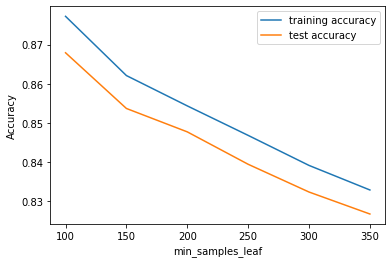

In [182]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_split

In [183]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,  
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=100),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [184]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.278896,0.339719,0.133844,0.004479,200,{'min_samples_split': 200},0.894873,0.885940,0.888400,0.891363,0.887479,0.889611,0.003170,1,0.901308,0.899948,0.898395,0.900631,0.901861,0.900429,0.001203
1,13.842230,0.090517,0.130445,0.006133,250,{'min_samples_split': 250},0.884516,0.875194,0.884386,0.887738,0.880746,0.882516,0.004278,2,0.891985,0.890238,0.894478,0.894708,0.893348,0.892951,0.001666
2,13.660907,0.193140,0.131650,0.008249,300,{'min_samples_split': 300},0.877654,0.871569,0.875453,0.878804,0.871035,0.874903,0.003136,3,0.884929,0.886191,0.888360,0.886422,0.885936,0.886368,0.001119
3,13.815846,0.364901,0.124667,0.003512,350,{'min_samples_split': 350},0.877266,0.864966,0.865484,0.871164,0.864042,0.868585,0.005007,4,0.881271,0.880592,0.879167,0.878233,0.878395,0.879532,0.001205
4,13.405592,0.089474,0.126256,0.005456,400,{'min_samples_split': 400},0.867297,0.862895,0.865484,0.870905,0.861712,0.865659,0.003270,5,0.872920,0.875833,0.873827,0.876873,0.873701,0.874631,0.001477


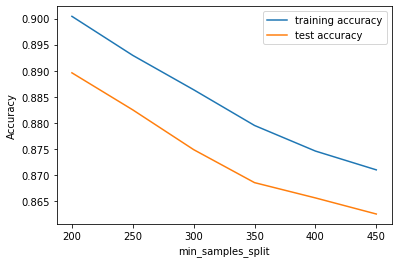

In [185]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Grid Search to Find Optimal Hyperparameters

In [186]:
# Create the parameter grid based on the results of random search 
parameters = {
    'max_depth': [10,15],
    'min_samples_leaf': range(100, 200, 50),
    'min_samples_split': range(250, 350, 50),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

# specify number of folds for k-fold CV
n_folds = 5

# instantiate the model
rf = RandomForestClassifier(random_state=100)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,  
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': [10, 15], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 200, 50),
                         'min_samples_split': range(250, 350, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [187]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.868481050871136 using {'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 250, 'n_estimators': 300}


#### Fitting the final model with the best parameters obtained from grid search.

In [188]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

# fit
rfc.fit(df_train_pca,y_train)


RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [189]:
# predict
y_test_pred_rf_hyper = rfc.predict(df_test_pca)


In [190]:

print(classification_report(y_test,y_test_pred_rf_hyper))



              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92      8251
         1.0       0.36      0.77      0.49       750

    accuracy                           0.87      9001
   macro avg       0.67      0.82      0.71      9001
weighted avg       0.93      0.87      0.89      9001



In [191]:
confusion_matrix_rf_hyper = confusion_matrix(y_test,y_test_pred_rf_hyper)
print(' Confusion matrix: ' , confusion_matrix_rf_hyper)

 Confusion matrix:  [[7227 1024]
 [ 173  577]]


In [193]:
TP = confusion_matrix_rf_hyper[1,1] # true positive 
TN = confusion_matrix_rf_hyper[0,0] # true negatives
FP = confusion_matrix_rf_hyper[0,1] # false positives
FN = confusion_matrix_rf_hyper[1,0] # false negatives

print('Acuracy Score: %0.2f' % accuracy_score(y_test,y_test_pred_rf_hyper))

# sensitivity
print('Sensitivity: %0.2f' %(TP / float(TP+FN)))

# specificity
print('Specificity: %0.2f' %(TN / float(TN+FP)))

# false postive rate
print('false postive rate: %0.2f' %(FP/ float(TN+FP)))

# positive predictive value 
print('positive predictive value: %0.2f' %(TP / float(TP+FP)))

# Negative predictive value
print('Negative predictive value: %0.2f' %(TN / float(TN+ FN)))


Acuracy Score: 0.87
Sensitivity: 0.77
Specificity: 0.88
false postive rate: 0.12
positive predictive value: 0.36
Negative predictive value: 0.98


### Recommendations for Model Selection

|           | Logistic(PCA) | Decision Tree(PCA) | Random Forest(PCA) |
| --- | --- | --- | --- |
| Accuracy | 81% | 82% | 87% |
| Sensitivity | 82% | 68% | 77% |
| Specificity | 82% | 84% | 88% |

Since it is important to identify churners more accurately compared to non churners we should select the model based on **highest sensitivity**.<br>
As per the above summary , we will recommend ***Logistic regression model*** as it has the highest sensitivity with 82% and accuracy of 81%

### Listing important Predictors (as per  Logistic Regression with RFE performed earlier)

In [199]:
print(*list(rfe_col),sep='\n')

arpu_6
loc_og_mou_8
total_og_mou_7
total_og_mou_8
loc_ic_mou_8
std_ic_mou_8
total_ic_mou_7
spl_ic_mou_8
total_rech_num_7
vol_2g_mb_8
monthly_2g_8
sachet_2g_8
monthly_3g_8
vbc_3g_8


In [263]:
# Creating separate dataframes for few predictors and plotting them later
df_loc_ic = telco.groupby(['churn'])['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'].mean()
df_loc_og = telco.groupby(['churn'])['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'].mean()
df_vol_2g = telco.groupby(['churn'])['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8'].mean()
df_monthly_3g = telco.groupby(['churn'])['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'].mean()
df_std_ic = telco.groupby(['churn'])['std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'].mean()
df_total_og = telco.groupby(['churn'])['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'].mean()

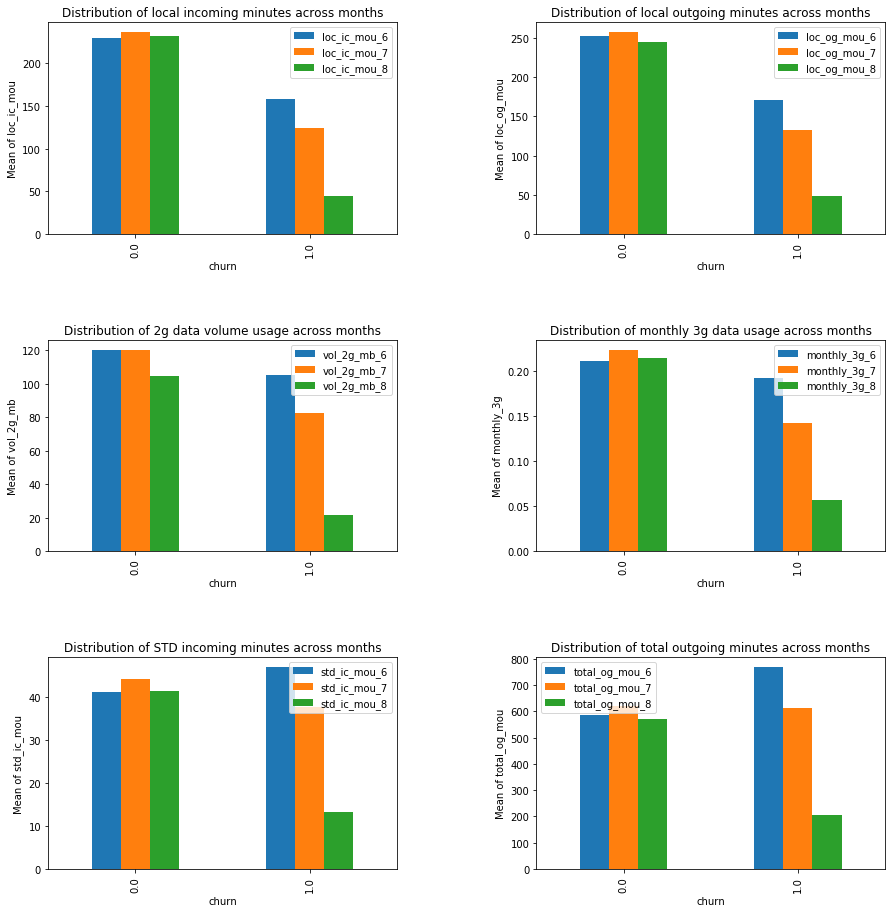

In [287]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,12))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

df_loc_ic.plot.bar(ax=axes[0,0])
axes[0][0].set_title('Distribution of local incoming minutes across months')
axes[0][0].set_xlabel('churn')
axes[0][0].set_ylabel('Mean of loc_ic_mou')

df_loc_og.plot.bar(ax=axes[0,1])
axes[0][1].set_title('Distribution of local outgoing minutes across months')
axes[0][1].set_xlabel('churn')
axes[0][1].set_ylabel('Mean of loc_og_mou')

df_vol_2g.plot.bar(ax=axes[1,0])
axes[1][0].set_title('Distribution of 2g data volume usage across months')
axes[1][0].set_xlabel('churn')
axes[1][0].set_ylabel('Mean of vol_2g_mb')

df_monthly_3g.plot.bar(ax=axes[1,1])
axes[1][1].set_title('Distribution of monthly 3g data usage across months')
axes[1][1].set_xlabel('churn')
axes[1][1].set_ylabel('Mean of monthly_3g')

df_std_ic.plot.bar(ax=axes[2,0])
axes[2][0].set_title('Distribution of STD incoming minutes across months')
axes[2][0].set_xlabel('churn')
axes[2][0].set_ylabel('Mean of std_ic_mou')

df_total_og.plot.bar(ax=axes[2,1])
axes[2][1].set_title('Distribution of total outgoing minutes across months')
axes[2][1].set_xlabel('churn')
axes[2][1].set_ylabel('Mean of total_og_mou');

For non churners all the values are consistent while for churners we can see significant drop from 6th to 8th month.

### Strategy Recommendations

We would recommend focussing on below parameters:

1. 2g and 3g usage trend
2. Incoming and outgoing minutes of usage trend
3. Strategize the Tariff for STD and local calls